In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:


def generate_data(num_samples=10000):
    doshas = ['Vata', 'Pitta', 'Kapha']
    data = []

    for _ in range(num_samples):
        dosha = np.random.choice(doshas, p=[0.33, 0.33, 0.34])  # Balanced classes

        if dosha == 'Vata':
            body_frame = 'Thin, light' if np.random.rand() < 0.8 else np.random.choice(['Medium, muscular', 'Heavy, broad'], p=[0.75, 0.25])
            # skin_texture = 'Dry, rough, cold' if np.random.rand() < 0.85 else np.random.choice(['Warm, oily, reddish', 'Smooth, moist, thick'], p=[0.75, 0.25])
            skin_texture = np.random.choice(
                ['Dry, rough, cold', 'Warm, oily, reddish', 'Smooth, moist, thick'],
                p=[0.9, 0.07, 0.03]
            )
            # hair_type = 'Dry, frizzy, brittle' if np.random.rand() < 0.8 else np.random.choice(['Soft, oily, reddish/brown', 'Thick, strong, oily'], p=[0.75, 0.25])
            hair_type = 'Dry, frizzy, brittle' if np.random.rand() < 0.8 else \
                np.random.choice(['Soft, oily, reddish/brown', 'Thick, strong, oily'],
                                 p=[0.6, 0.4])
            eyes = 'Small, dry, dull' if np.random.rand() < 0.8 else np.random.choice(['Sharp, intense, reddish', 'Large, calm, watery'], p=[0.75, 0.25])
            sleep_pattern = 'Light, interrupted' if np.random.rand() < 0.8 else np.random.choice(['Moderate', 'Deep, prolonged'], p=[0.75, 0.25])
            appetite = 'Irregular' if np.random.rand() < 0.85 else np.random.choice(['Strong, frequent hunger', 'Slow, steady'], p=[0.67, 0.33])
            digestion = 'Variable, bloating' if np.random.rand() < 0.8 else np.random.choice(['Fast, prone to acidity', 'Slow, sluggish'], p=[0.75, 0.25])
            sweating = 'Less' if np.random.rand() < 0.8 else np.random.choice(['Profuse, with odor', 'Moderate, little odor'], p=[0.75, 0.25])
            # speech_voice = 'Fast, low pitch' if np.random.rand() < 0.8 else np.random.choice(['Sharp, loud', 'Slow, melodious'], p=[0.75, 0.25])
            speech_voice = 'Fast, low pitch' if np.random.rand() < 0.8 else np.random.choice(['Slow, melodious', 'Sharp, loud'], p=[0.7, 0.3])
            energy_levels = 'Variable, bursts of energy' if np.random.rand() < 0.8 else np.random.choice(['High but gets tired fast', 'Steady, consistent'], p=[0.75, 0.25])
            body_temperature = 'Cold' if np.random.rand() < 0.8 else np.random.choice(['Warm', 'Cool'], p=[0.75, 0.25])
            weather_sensitivity = 'Dislikes cold, wind' if np.random.rand() < 0.8 else np.random.choice(['Dislikes heat', 'Dislikes damp, cold'], p=[0.75, 0.25])
            memory = 'Quick grasp, poor retention' if np.random.rand() < 0.8 else np.random.choice(['Sharp memory, good retention', 'Slow learning, excellent retention'], p=[0.75, 0.25])
            motion_tendencies = 'Restless, always moving' if np.random.rand() < 0.8 else np.random.choice(['Purposeful, active', 'Slow, steady'], p=[0.75, 0.25])
            mindset_emotion = 'Fear, anxiety' if np.random.rand() < 0.8 else np.random.choice(['Anger, irritability', 'Calm, possessive'], p=[0.75, 0.25])
            elimination_stool = 'Dry, hard, constipation' if np.random.rand() < 0.8 else np.random.choice(['Loose, frequent', 'Well-formed, slow'], p=[0.75, 0.25])
            sleep_requirement = '4–6 hours' if np.random.rand() < 0.8 else np.random.choice(['6–7 hours', '8–10 hours'], p=[0.75, 0.25])
            hunger_onset = 'Irregular' if np.random.rand() < 0.8 else np.random.choice(['Sharp, quick hunger', 'Mild, slow hunger'], p=[0.75, 0.25])
            speech_pace = 'Fast' if np.random.rand() < 0.8 else np.random.choice(['Measured', 'Slow'], p=[0.75, 0.25])
            weight_tendency = 'Underweight' if np.random.rand() < 0.8 else np.random.choice(['Normal weight', 'Tendency to gain weight'], p=[0.75, 0.25])

        elif dosha == 'Pitta':
            body_frame = 'Medium, muscular' if np.random.rand() < 0.8 else np.random.choice(['Thin, light', 'Heavy, broad'], p=[0.75, 0.25])
            # skin_texture = 'Warm, oily, reddish' if np.random.rand() < 0.85 else np.random.choice(['Dry, rough, cold', 'Smooth, moist, thick'], p=[0.75, 0.25])
            skin_texture = np.random.choice(
                ['Warm, oily, reddish', 'Dry, rough, cold', 'Smooth, moist, thick'],
                p=[0.9, 0.07, 0.03]
            )
            # hair_type = 'Soft, oily, reddish/brown' if np.random.rand() < 0.8 else np.random.choice(['Dry, frizzy, brittle', 'Thick, strong, oily'], p=[0.75, 0.25])
            hair_type = 'Soft, oily, reddish/brown' if np.random.rand() < 0.8 else \
                np.random.choice(['Thick, strong, oily', 'Dry, frizzy, brittle'],
                                 p=[0.7, 0.3])
            eyes = 'Sharp, intense, reddish' if np.random.rand() < 0.8 else np.random.choice(['Small, dry, dull', 'Large, calm, watery'], p=[0.75, 0.25])
            sleep_pattern = 'Moderate' if np.random.rand() < 0.8 else np.random.choice(['Light, interrupted', 'Deep, prolonged'], p=[0.75, 0.25])
            appetite = 'Strong, frequent hunger' if np.random.rand() < 0.85 else np.random.choice(['Irregular', 'Slow, steady'], p=[0.67, 0.33])
            digestion = 'Fast, prone to acidity' if np.random.rand() < 0.8 else np.random.choice(['Variable, bloating', 'Slow, sluggish'], p=[0.75, 0.25])
            sweating = 'Profuse, with odor' if np.random.rand() < 0.8 else np.random.choice(['Less', 'Moderate, little odor'], p=[0.75, 0.25])
            # speech_voice = 'Sharp, loud' if np.random.rand() < 0.8 else np.random.choice(['Fast, low pitch', 'Slow, melodious'], p=[0.75, 0.25])
            speech_voice = 'Sharp, loud' if np.random.rand() < 0.85 else np.random.choice(['Slow, melodious', 'Fast, low pitch'], p=[0.6, 0.4])
            energy_levels = 'High but gets tired fast' if np.random.rand() < 0.8 else np.random.choice(['Variable, bursts of energy', 'Steady, consistent'], p=[0.75, 0.25])
            body_temperature = 'Warm' if np.random.rand() < 0.8 else np.random.choice(['Cold', 'Cool'], p=[0.75, 0.25])
            weather_sensitivity = 'Dislikes heat' if np.random.rand() < 0.8 else np.random.choice(['Dislikes cold, wind', 'Dislikes damp, cold'], p=[0.75, 0.25])
            memory = 'Sharp memory, good retention' if np.random.rand() < 0.8 else np.random.choice(['Quick grasp, poor retention', 'Slow learning, excellent retention'], p=[0.75, 0.25])
            motion_tendencies = 'Purposeful, active' if np.random.rand() < 0.8 else np.random.choice(['Restless, always moving', 'Slow, steady'], p=[0.75, 0.25])
            mindset_emotion = 'Anger, irritability' if np.random.rand() < 0.8 else np.random.choice(['Fear, anxiety', 'Calm, possessive'], p=[0.75, 0.25])
            elimination_stool = 'Loose, frequent' if np.random.rand() < 0.8 else np.random.choice(['Dry, hard, constipation', 'Well-formed, slow'], p=[0.75, 0.25])
            sleep_requirement = '6–7 hours' if np.random.rand() < 0.8 else np.random.choice(['4–6 hours', '8–10 hours'], p=[0.75, 0.25])
            hunger_onset = 'Sharp, quick hunger' if np.random.rand() < 0.8 else np.random.choice(['Irregular', 'Mild, slow hunger'], p=[0.75, 0.25])
            speech_pace = 'Measured' if np.random.rand() < 0.8 else np.random.choice(['Fast', 'Slow'], p=[0.75, 0.25])
            weight_tendency = 'Normal weight' if np.random.rand() < 0.8 else np.random.choice(['Underweight', 'Tendency to gain weight'], p=[0.75, 0.25])

        elif dosha == 'Kapha':
            body_frame = 'Heavy, broad' if np.random.rand() < 0.8 else np.random.choice(['Thin, light', 'Medium, muscular'], p=[0.75, 0.25])
            # skin_texture = 'Smooth, moist, thick' if np.random.rand() < 0.85 else np.random.choice(['Dry, rough, cold', 'Warm, oily, reddish'], p=[0.75, 0.25])
            skin_texture = np.random.choice(
                ['Smooth, moist, thick', 'Dry, rough, cold', 'Warm, oily, reddish'],
                p=[0.9, 0.05, 0.05]
            )
            # hair_type = 'Thick, strong, oily' if np.random.rand() < 0.8 else np.random.choice(['Dry, frizzy, brittle', 'Soft, oily, reddish/brown'], p=[0.75, 0.25])
            hair_type = 'Thick, strong, oily' if np.random.rand() < 0.8 else \
                np.random.choice(['Soft, oily, reddish/brown', 'Dry, frizzy, brittle'],
                                 p=[0.7, 0.3])
            eyes = 'Large, calm, watery' if np.random.rand() < 0.8 else np.random.choice(['Small, dry, dull', 'Sharp, intense, reddish'], p=[0.75, 0.25])
            sleep_pattern = 'Deep, prolonged' if np.random.rand() < 0.8 else np.random.choice(['Light, interrupted', 'Moderate'], p=[0.75, 0.25])
            appetite = 'Slow, steady' if np.random.rand() < 0.85 else np.random.choice(['Irregular', 'Strong, frequent hunger'], p=[0.67, 0.33])
            digestion = 'Slow, sluggish' if np.random.rand() < 0.8 else np.random.choice(['Variable, bloating', 'Fast, prone to acidity'], p=[0.75, 0.25])
            sweating = 'Moderate, little odor' if np.random.rand() < 0.8 else np.random.choice(['Less', 'Profuse, with odor'], p=[0.75, 0.25])
            # speech_voice = 'Slow, melodious' if np.random.rand() < 0.8 else np.random.choice(['Fast, low pitch', 'Sharp, loud'], p=[0.75, 0.25])
            speech_voice = 'Slow, melodious' if np.random.rand() < 0.85 else np.random.choice(['Fast, low pitch', 'Sharp, loud'], p=[0.6, 0.4])
            energy_levels = 'Steady, consistent' if np.random.rand() < 0.8 else np.random.choice(['Variable, bursts of energy', 'High but gets tired fast'], p=[0.75, 0.25])
            body_temperature = 'Cool' if np.random.rand() < 0.8 else np.random.choice(['Cold', 'Warm'], p=[0.75, 0.25])
            weather_sensitivity = 'Dislikes damp, cold' if np.random.rand() < 0.8 else np.random.choice(['Dislikes cold, wind', 'Dislikes heat'], p=[0.75, 0.25])
            memory = 'Slow learning, excellent retention' if np.random.rand() < 0.8 else np.random.choice(['Quick grasp, poor retention', 'Sharp memory, good retention'], p=[0.75, 0.25])
            motion_tendencies = 'Slow, steady' if np.random.rand() < 0.8 else np.random.choice(['Restless, always moving', 'Purposeful, active'], p=[0.75, 0.25])
            mindset_emotion = 'Calm, possessive' if np.random.rand() < 0.8 else np.random.choice(['Fear, anxiety', 'Anger, irritability'], p=[0.75, 0.25])
            elimination_stool = 'Well-formed, slow' if np.random.rand() < 0.8 else np.random.choice(['Dry, hard, constipation', 'Loose, frequent'], p=[0.75, 0.25])
            sleep_requirement = '8–10 hours' if np.random.rand() < 0.8 else np.random.choice(['4–6 hours', '6–7 hours'], p=[0.75, 0.25])
            hunger_onset = 'Mild, slow hunger' if np.random.rand() < 0.8 else np.random.choice(['Irregular', 'Sharp, quick hunger'], p=[0.75, 0.25])
            speech_pace = 'Slow' if np.random.rand() < 0.8 else np.random.choice(['Fast', 'Measured'], p=[0.75, 0.25])
            weight_tendency = 'Tendency to gain weight' if np.random.rand() < 0.8 else np.random.choice(['Underweight', 'Normal weight'], p=[0.75, 0.25])

        # Correlated noise example
        if skin_texture == 'Dry, rough, cold' and np.random.rand() < 0.7:
            appetite = 'Irregular'

        data.append([
            dosha, body_frame, skin_texture, hair_type, eyes, sleep_pattern, appetite, digestion, sweating, speech_voice,
            energy_levels, body_temperature, weather_sensitivity, memory, motion_tendencies, mindset_emotion, elimination_stool,
            sleep_requirement, hunger_onset, speech_pace, weight_tendency
        ])

    columns = ['Dosha', 'Body_Frame', 'Skin_Texture', 'Hair_Type', 'Eyes', 'Sleep_Pattern', 'Appetite', 'Digestion', 'Sweating', 'Speech_Voice',
               'Energy_Levels', 'Body_Temperature', 'Weather_Sensitivity', 'Memory', 'Motion_Tendencies', 'Mindset_Emotion', 'Elimination_Stool',
               'Sleep_Requirement', 'Hunger_Onset', 'Speech_Pace', 'Weight_Tendency']

    return pd.DataFrame(data, columns=columns)

# Generate synthetic data
synthetic_data = generate_data(10000)

# Save to CSV
synthetic_data.to_csv('synthetic_data.csv', index=False)

# Display first few rows
print(synthetic_data.head())


   Dosha        Body_Frame          Skin_Texture                  Hair_Type  \
0  Pitta  Medium, muscular   Warm, oily, reddish  Soft, oily, reddish/brown   
1   Vata       Thin, light      Dry, rough, cold       Dry, frizzy, brittle   
2  Kapha      Heavy, broad  Smooth, moist, thick        Thick, strong, oily   
3  Kapha      Heavy, broad  Smooth, moist, thick        Thick, strong, oily   
4   Vata       Thin, light      Dry, rough, cold       Dry, frizzy, brittle   

                      Eyes       Sleep_Pattern                 Appetite  \
0  Sharp, intense, reddish  Light, interrupted  Strong, frequent hunger   
1         Small, dry, dull  Light, interrupted                Irregular   
2      Large, calm, watery     Deep, prolonged             Slow, steady   
3      Large, calm, watery     Deep, prolonged             Slow, steady   
4         Small, dry, dull  Light, interrupted                Irregular   

                Digestion               Sweating     Speech_Voice  ...  \


In [ ]:
df = pd.read_csv('synthetic_data.csv')

In [ ]:
df.shape

(10000, 21)

In [ ]:
df.head()

,Dosha,Body_Frame,Skin_Texture,Hair_Type,Eyes,Sleep_Pattern,Appetite,Digestion,Sweating,Speech_Voice,...,Body_Temperature,Weather_Sensitivity,Memory,Motion_Tendencies,Mindset_Emotion,Elimination_Stool,Sleep_Requirement,Hunger_Onset,Speech_Pace,Weight_Tendency
0,Pitta,"Medium, muscular","Warm, oily, reddish","Soft, oily, reddish/brown","Sharp, intense, reddish","Light, interrupted","Strong, frequent hunger","Fast, prone to acidity","Profuse, with odor","Sharp, loud",...,Warm,Dislikes heat,"Sharp memory, good retention","Purposeful, active","Calm, possessive","Loose, frequent",6–7 hours,Irregular,Measured,Normal weight
1,Vata,"Thin, light","Dry, rough, cold","Dry, frizzy, brittle","Small, dry, dull","Light, interrupted",Irregular,"Fast, prone to acidity",Less,"Fast, low pitch",...,Cold,Dislikes heat,"Quick grasp, poor retention","Purposeful, active","Fear, anxiety","Dry, hard, constipation",4–6 hours,"Sharp, quick hunger",Fast,Underweight
2,Kapha,"Heavy, broad","Smooth, moist, thick","Thick, strong, oily","Large, calm, watery","Deep, prolonged","Slow, steady","Slow, sluggish","Moderate, little odor","Slow, melodious",...,Cool,"Dislikes damp, cold","Slow learning, excellent retention","Slow, steady","Calm, possessive","Dry, hard, constipation",4–6 hours,"Mild, slow hunger",Slow,Tendency to gain weight
3,Kapha,"Heavy, broad","Smooth, moist, thick","Thick, strong, oily","Large, calm, watery","Deep, prolonged","Slow, steady","Slow, sluggish","Moderate, little odor","Slow, melodious",...,Cool,"Dislikes damp, cold","Slow learning, excellent retention","Slow, steady","Fear, anxiety","Well-formed, slow",8–10 hours,"Mild, slow hunger",Slow,Tendency to gain weight
4,Vata,"Thin, light","Dry, rough, cold","Dry, frizzy, brittle","Small, dry, dull","Light, interrupted",Irregular,"Variable, bloating",Less,"Fast, low pitch",...,Warm,"Dislikes cold, wind","Quick grasp, poor retention","Restless, always moving","Fear, anxiety","Dry, hard, constipation",4–6 hours,"Sharp, quick hunger",Measured,Underweight


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Dosha                10000 non-null  object
 1   Body_Frame           10000 non-null  object
 2   Skin_Texture         10000 non-null  object
 3   Hair_Type            10000 non-null  object
 4   Eyes                 10000 non-null  object
 5   Sleep_Pattern        10000 non-null  object
 6   Appetite             10000 non-null  object
 7   Digestion            10000 non-null  object
 8   Sweating             10000 non-null  object
 9   Speech_Voice         10000 non-null  object
 10  Energy_Levels        10000 non-null  object
 11  Body_Temperature     10000 non-null  object
 12  Weather_Sensitivity  10000 non-null  object
 13  Memory               10000 non-null  object
 14  Motion_Tendencies    10000 non-null  object
 15  Mindset_Emotion      10000 non-null  object
 16  Elimi

In [ ]:
df.columns

Index(['Dosha', 'Body_Frame', 'Skin_Texture', 'Hair_Type', 'Eyes',
       'Sleep_Pattern', 'Appetite', 'Digestion', 'Sweating', 'Speech_Voice',
       'Energy_Levels', 'Body_Temperature', 'Weather_Sensitivity', 'Memory',
       'Motion_Tendencies', 'Mindset_Emotion', 'Elimination_Stool',
       'Sleep_Requirement', 'Hunger_Onset', 'Speech_Pace', 'Weight_Tendency'],
      dtype='object')

In [ ]:
df['Dosha'].value_counts()

,count
Dosha,
Kapha,3368
Vata,3346
Pitta,3286


In [ ]:
df.isnull().sum()

,0
Dosha,0
Body_Frame,0
Skin_Texture,0
Hair_Type,0
Eyes,0
Sleep_Pattern,0
Appetite,0
Digestion,0
Sweating,0
Speech_Voice,0


In [ ]:
df.describe()

,Dosha,Body_Frame,Skin_Texture,Hair_Type,Eyes,Sleep_Pattern,Appetite,Digestion,Sweating,Speech_Voice,...,Body_Temperature,Weather_Sensitivity,Memory,Motion_Tendencies,Mindset_Emotion,Elimination_Stool,Sleep_Requirement,Hunger_Onset,Speech_Pace,Weight_Tendency
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
top,Kapha,"Thin, light","Warm, oily, reddish","Soft, oily, reddish/brown","Small, dry, dull","Light, interrupted",Irregular,"Variable, bloating",Less,"Slow, melodious",...,Cold,"Dislikes cold, wind","Quick grasp, poor retention","Restless, always moving","Fear, anxiety","Dry, hard, constipation",4–6 hours,Irregular,Fast,Underweight
freq,3368,3677,3407,3538,3649,3636,4062,3662,3657,3652,...,3660,3655,3677,3644,3675,3628,3619,3664,3670,3658


In [ ]:
df.duplicated().sum()

np.int64(1520)

In [ ]:
df = df.drop_duplicates()

In [ ]:
 df.shape

(8480, 21)

In [ ]:
sns.set(style = "whitegrid")
feature_cols = [col for col in df.columns if col != 'Dosha']

for col in feature_cols:
    print(f"\n🔹 Feature: {col}")
    crosstab = pd.crosstab(df[col], df['Dosha'], normalize='index') * 100
    dominant_dosha = crosstab.idxmax(axis=1)
    dominance_percent = crosstab.max(axis=1)

    result = pd.DataFrame({
        'Most_Likely_Dosha': dominant_dosha,
        'Confidence (%)': dominance_percent.round(1)
    })

    print(result.head())


🔹 Feature: Body_Frame
                 Most_Likely_Dosha  Confidence (%)
Body_Frame                                        
Heavy, broad                 Kapha            87.9
Medium, muscular             Pitta            78.1
Thin, light                   Vata            70.3

🔹 Feature: Skin_Texture
                     Most_Likely_Dosha  Confidence (%)
Skin_Texture                                          
Dry, rough, cold                  Vata            86.7
Smooth, moist, thick             Kapha            93.0
Warm, oily, reddish              Pitta            85.4

🔹 Feature: Hair_Type
                          Most_Likely_Dosha  Confidence (%)
Hair_Type                                                  
Dry, frizzy, brittle                   Vata            85.2
Soft, oily, reddish/brown             Pitta            72.5
Thick, strong, oily                   Kapha            76.8

🔹 Feature: Eyes
                        Most_Likely_Dosha  Confidence (%)
Eyes                     

<Figure size 1000x400 with 0 Axes>

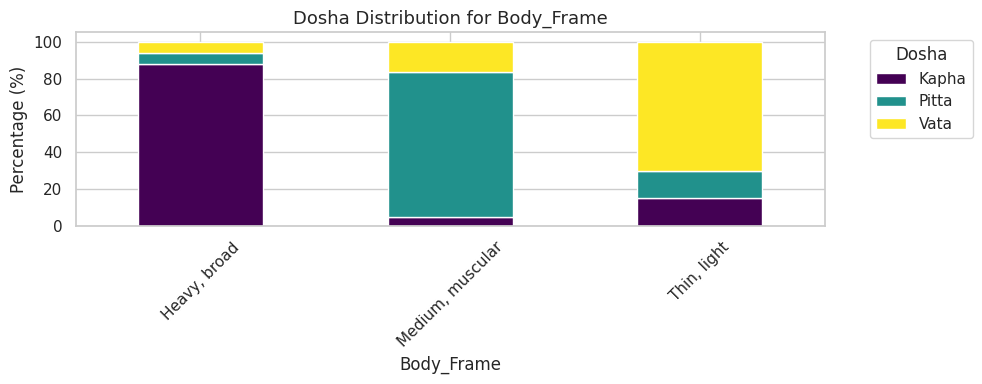

<Figure size 1000x400 with 0 Axes>

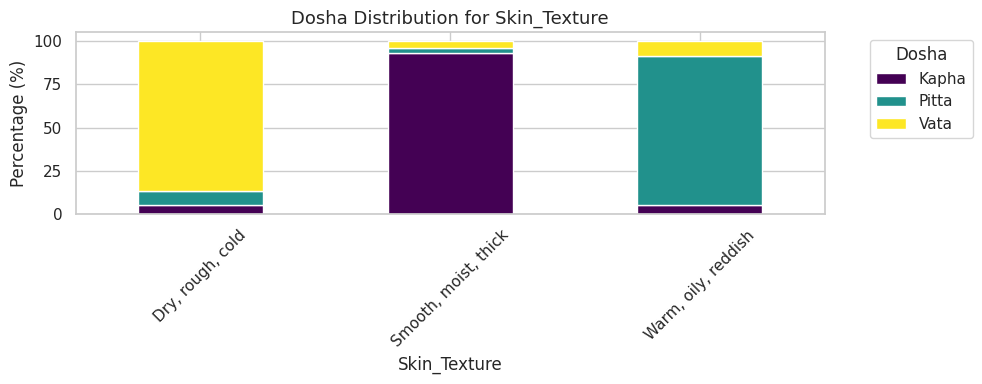

<Figure size 1000x400 with 0 Axes>

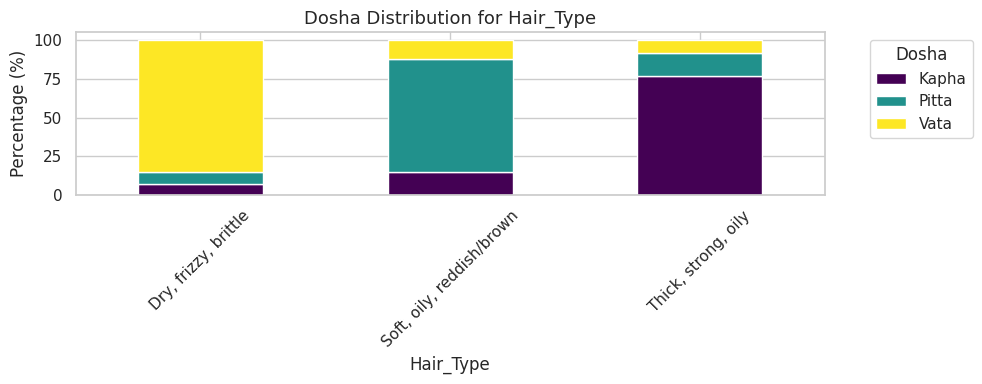

<Figure size 1000x400 with 0 Axes>

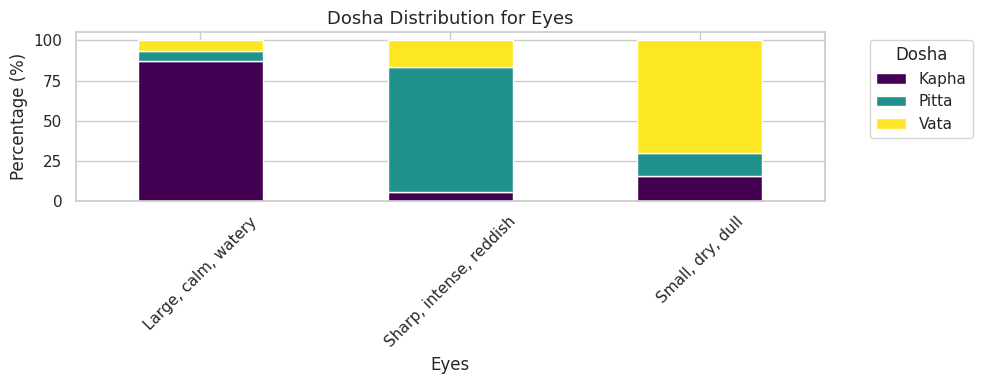

<Figure size 1000x400 with 0 Axes>

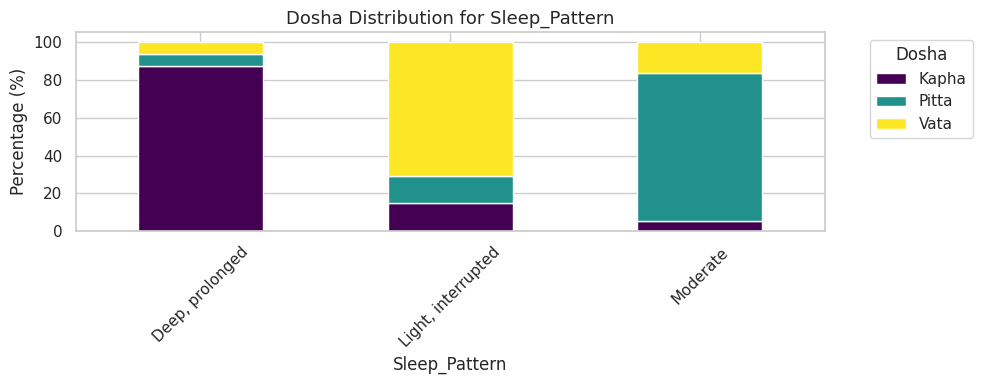

<Figure size 1000x400 with 0 Axes>

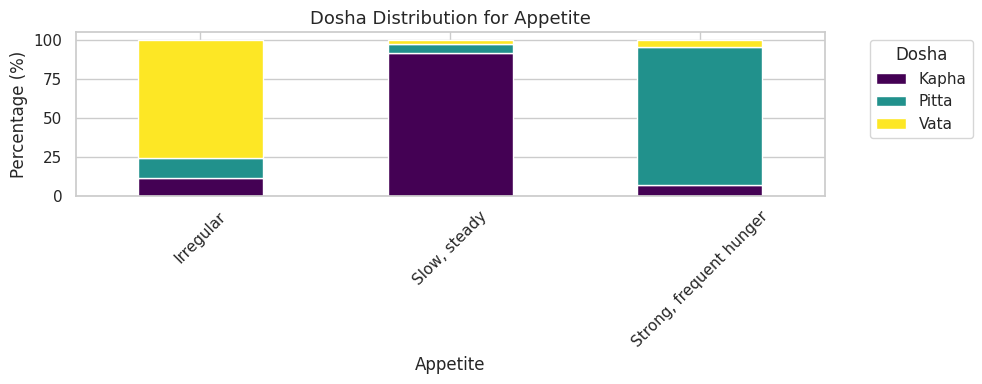

<Figure size 1000x400 with 0 Axes>

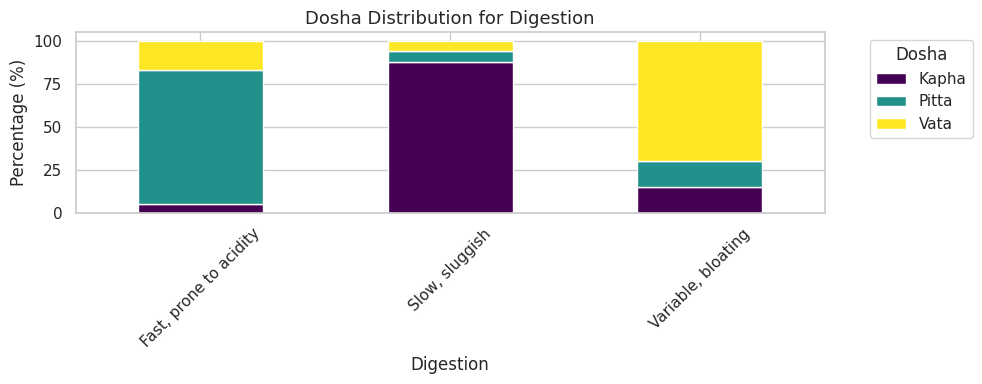

<Figure size 1000x400 with 0 Axes>

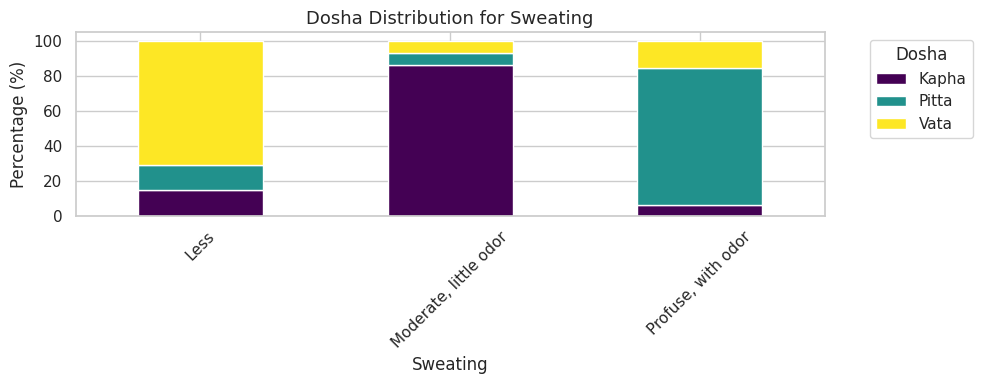

<Figure size 1000x400 with 0 Axes>

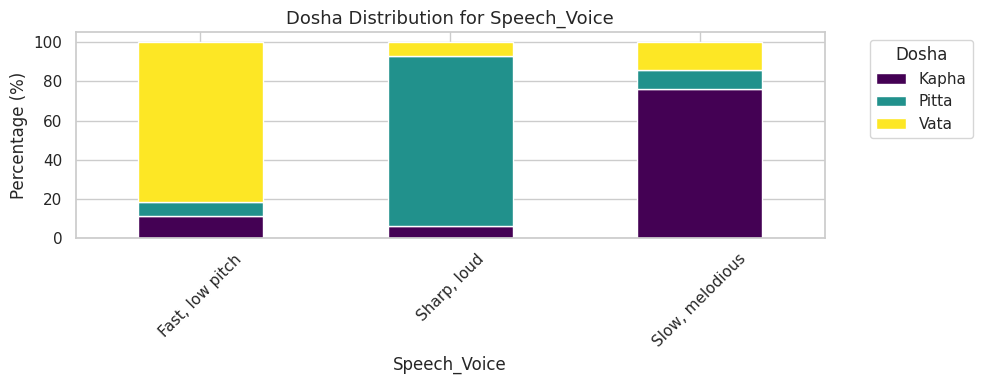

<Figure size 1000x400 with 0 Axes>

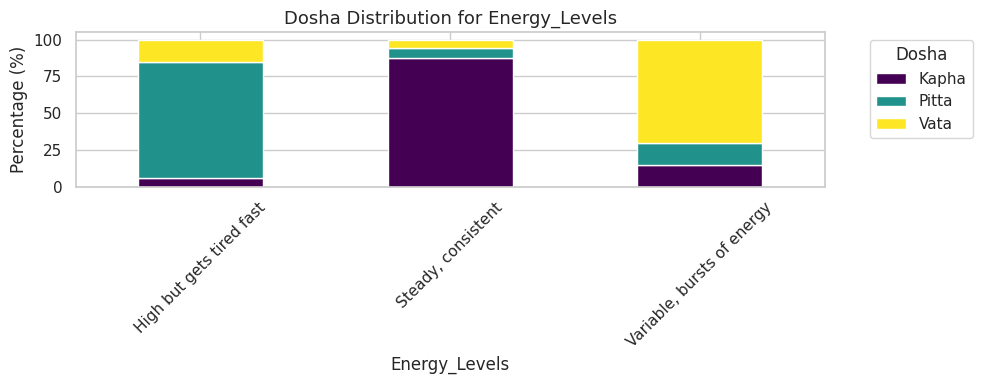

<Figure size 1000x400 with 0 Axes>

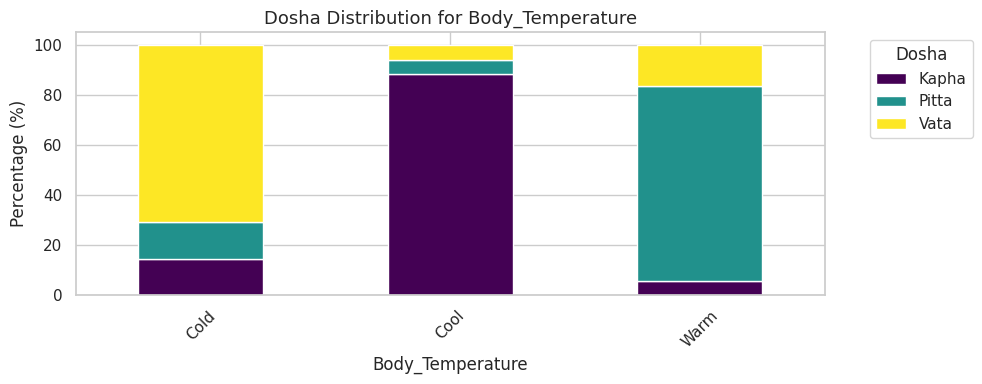

<Figure size 1000x400 with 0 Axes>

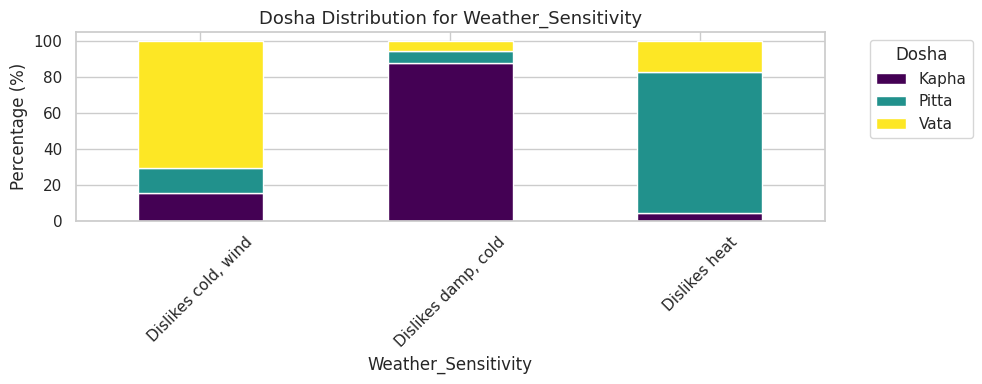

<Figure size 1000x400 with 0 Axes>

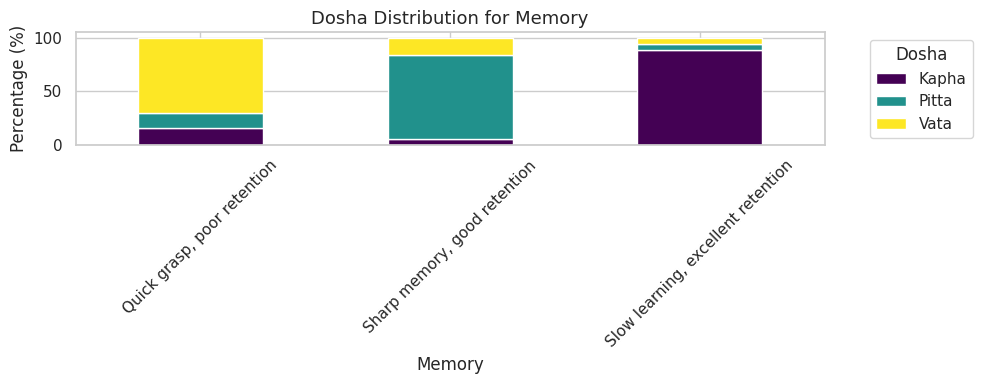

<Figure size 1000x400 with 0 Axes>

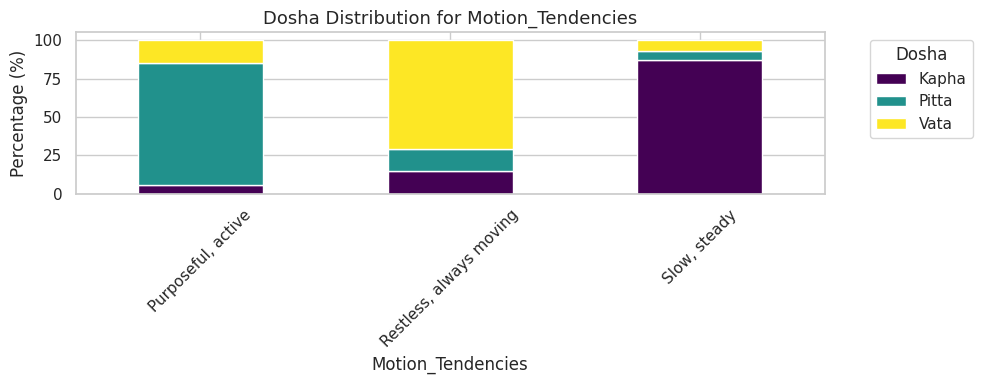

<Figure size 1000x400 with 0 Axes>

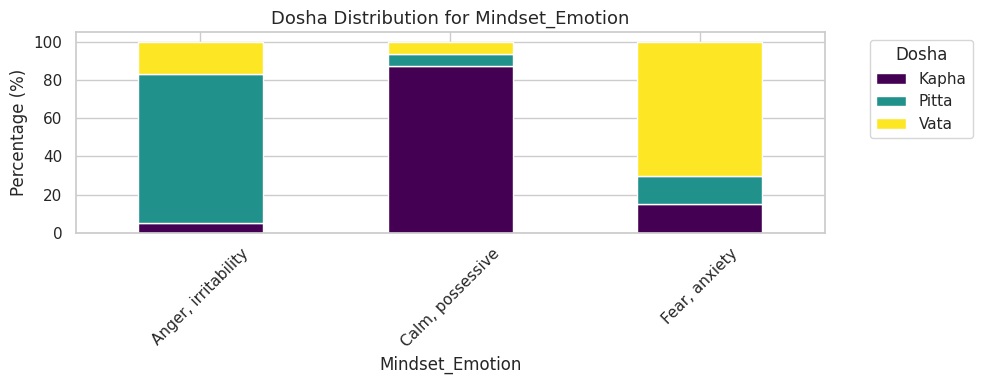

<Figure size 1000x400 with 0 Axes>

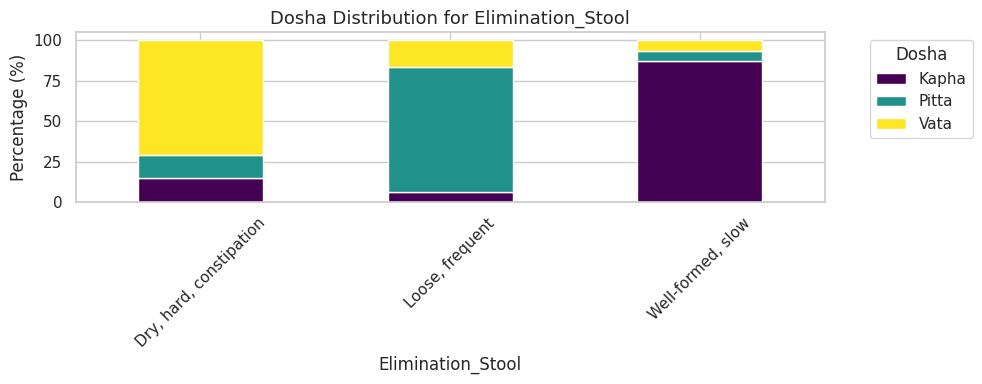

<Figure size 1000x400 with 0 Axes>

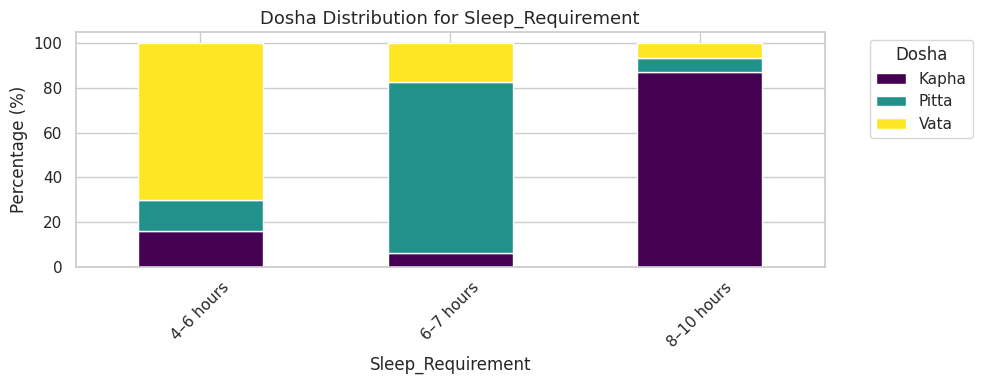

<Figure size 1000x400 with 0 Axes>

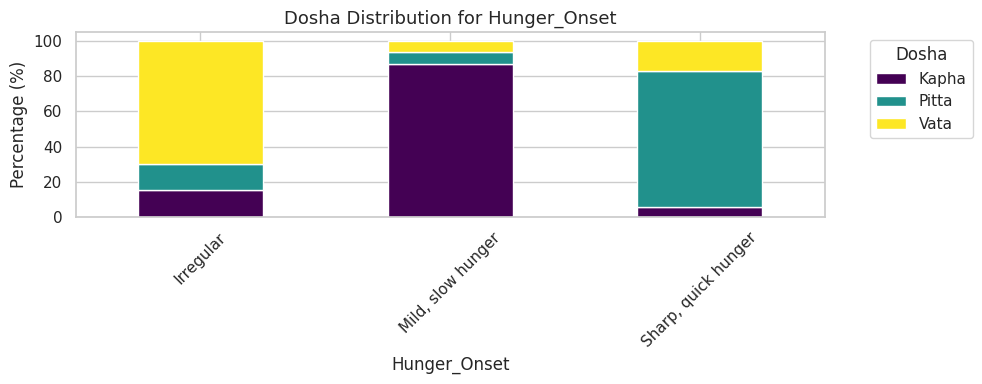

<Figure size 1000x400 with 0 Axes>

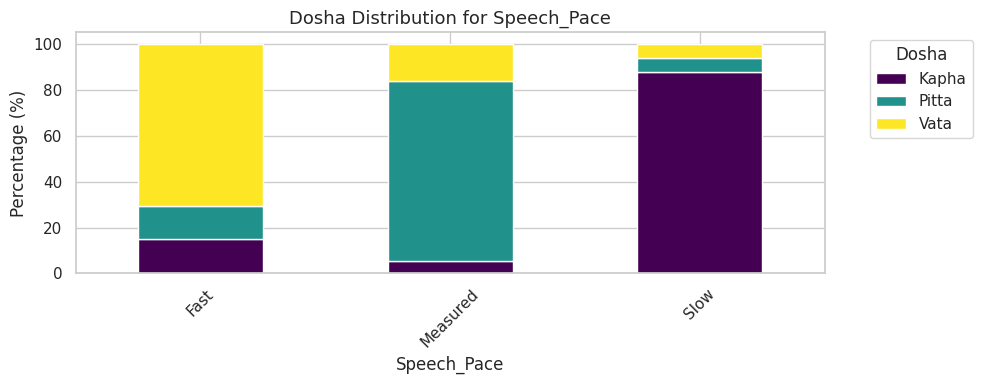

<Figure size 1000x400 with 0 Axes>

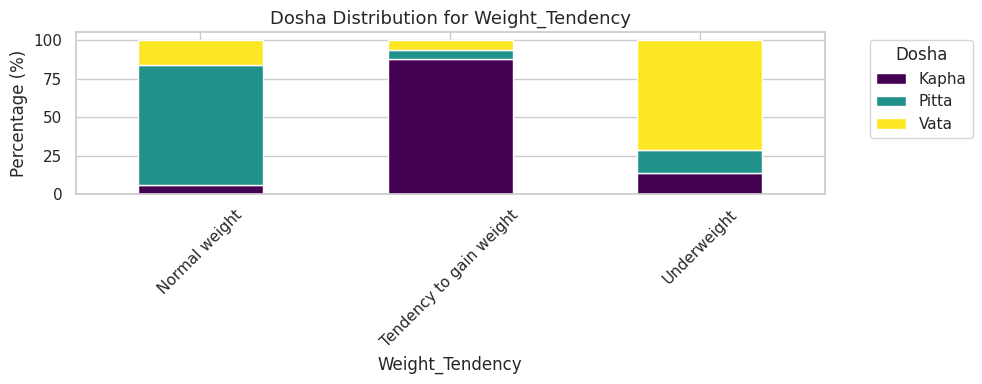

In [ ]:
for col in feature_cols:
    plt.figure(figsize=(10, 4))
    crosstab = pd.crosstab(df[col], df['Dosha'], normalize='index') * 100
    crosstab.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 4))

    plt.title(f'Dosha Distribution for {col}', fontsize=13)
    plt.ylabel('Percentage (%)')
    plt.xlabel(col)
    plt.legend(title='Dosha', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

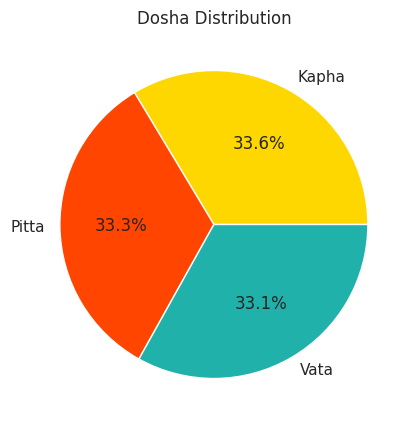

In [ ]:
df['Dosha'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#FFD700', '#FF4500', '#20B2AA'], figsize=(5,5))
plt.title('Dosha Distribution')
plt.ylabel('')
plt.show()


In [ ]:
X = df.drop('Dosha', axis=1)
y = df['Dosha']

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)

In [ ]:
encoded_columns = encoder.get_feature_names_out(X.columns)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_columns)

In [ ]:
print("Encoded shape:", X_encoded_df.shape)
X_encoded_df.head()

Encoded shape: (8480, 60)


,"Body_Frame_Heavy, broad","Body_Frame_Medium, muscular","Body_Frame_Thin, light","Skin_Texture_Dry, rough, cold","Skin_Texture_Smooth, moist, thick","Skin_Texture_Warm, oily, reddish","Hair_Type_Dry, frizzy, brittle","Hair_Type_Soft, oily, reddish/brown","Hair_Type_Thick, strong, oily","Eyes_Large, calm, watery",...,Sleep_Requirement_8–10 hours,Hunger_Onset_Irregular,"Hunger_Onset_Mild, slow hunger","Hunger_Onset_Sharp, quick hunger",Speech_Pace_Fast,Speech_Pace_Measured,Speech_Pace_Slow,Weight_Tendency_Normal weight,Weight_Tendency_Tendency to gain weight,Weight_Tendency_Underweight
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
print("Label Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


Label Mapping: {'Kapha': np.int64(0), 'Pitta': np.int64(1), 'Vata': np.int64(2)}


#Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded_df, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

In [ ]:
X_train.shape

(6784, 60)

In [ ]:
X_test.shape

(1696, 60)

In [ ]:
unique, train_counts = np.unique(y_train, return_counts=True)
print("Train set Dosha distribution:", dict(zip(label_encoder.inverse_transform(unique), train_counts)))

unique, test_counts = np.unique(y_test, return_counts=True)
print("Test set Dosha distribution:", dict(zip(label_encoder.inverse_transform(unique), test_counts)))

Train set Dosha distribution: {'Kapha': np.int64(2281), 'Pitta': np.int64(2258), 'Vata': np.int64(2245)}
Test set Dosha distribution: {'Kapha': np.int64(570), 'Pitta': np.int64(565), 'Vata': np.int64(561)}


In [ ]:


def add_noise(X, noise_level=0.1):
    """
    Works for Pandas DataFrame (One-hot encoded binary data)
    """
    X_noisy = X.copy()

    # Convert to numpy array for index operations
    data = X_noisy.to_numpy()
    n_samples, n_features = data.shape
    total_values = n_samples * n_features
    n_noisy = int(noise_level * total_values)

    indices = np.unravel_index(
        np.random.choice(total_values, n_noisy, replace=False),
        (n_samples, n_features)
    )

    # Flip 0 to 1 or 1 to 0
    data[indices] = 1 - data[indices]

    # Return as DataFrame again (to keep compatibility)
    return pd.DataFrame(data, columns=X_noisy.columns, index=X_noisy.index)


In [ ]:
X_train_noisy = add_noise(X_train, noise_level=0.10)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_noisy, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred_clean = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy on Clean Test Set:", round(accuracy_score(y_test, y_pred_clean), 4))
print("\n Classification Report (Clean):\n", classification_report(y_test, y_pred_clean))
print("\n Confusion Matrix (Clean):\n", confusion_matrix(y_test, y_pred_clean))


Accuracy on Clean Test Set: 0.9988

 Classification Report (Clean):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       570
           1       1.00      1.00      1.00       565
           2       1.00      1.00      1.00       561

    accuracy                           1.00      1696
   macro avg       1.00      1.00      1.00      1696
weighted avg       1.00      1.00      1.00      1696


 Confusion Matrix (Clean):
 [[570   0   0]
 [  0 565   0]
 [  1   1 559]]


In [ ]:
X_test_noisy = add_noise(X_test, noise_level=0.20)
y_pred_noisy = rf_model.predict(X_test_noisy)

print("\n Accuracy on 20% Noisy Test Set:", round(accuracy_score(y_test, y_pred_noisy), 4))
print("\n Classification Report (Noisy):\n", classification_report(y_test, y_pred_noisy))
print("\n Confusion Matrix (Noisy):\n", confusion_matrix(y_test, y_pred_noisy))



 Accuracy on 20% Noisy Test Set: 0.9829

 Classification Report (Noisy):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       570
           1       0.98      0.98      0.98       565
           2       0.97      0.98      0.98       561

    accuracy                           0.98      1696
   macro avg       0.98      0.98      0.98      1696
weighted avg       0.98      0.98      0.98      1696


 Confusion Matrix (Noisy):
 [[564   2   4]
 [  0 552  13]
 [  3   7 551]]


In [ ]:
def predict_dosha_verdict(user_input_df, model, encoder):
    user_encoded = encoder.transform(user_input_df)
    dosha_probs = model.predict_proba(user_encoded)[0]

    label_map = {0: 'Kapha', 1: 'Pitta', 2: 'Vata'}
    dosha_score = {label_map[i]: int(prob * 100) for i, prob in enumerate(dosha_probs)}

    sorted_doshas = sorted(dosha_score.items(), key=lambda x: x[1], reverse=True)
    top1, top2 = sorted_doshas[0], sorted_doshas[1]

    if top1[1] >= 70:
        verdict = f"🧬 Dominant Prakriti: {top1[0]}"
    else:
        verdict = f"⚖️ Mix Prakriti: {top1[0]} - {top2[0]}"

    return {
        "Prakriti_Score": dosha_score,
        "Verdict": verdict,
        "Recommendations": {
            "Diet": "...", "Yoga": "...", "Sleep": "...", "Stress": "..."
        }
    }


In [ ]:
user_input = {
    'Body_Frame': 'Medium, muscular',
    'Skin_Texture': 'Warm, oily, reddish',
    'Hair_Type': 'Soft, oily, reddish/brown',
    'Eyes': 'Sharp, intense, reddish',
    'Sleep_Pattern': 'Moderate',
    'Appetite': 'Strong, frequent hunger',
    'Digestion': 'Fast, prone to acidity',
    'Sweating': 'Profuse, with odor',
    'Speech_Voice': 'Sharp, loud',
    'Energy_Levels': 'High but gets tired fast',
    'Body_Temperature': 'Warm',
    'Weather_Sensitivity': 'Dislikes heat',
    'Memory': 'Sharp memory, good retention',
    'Motion_Tendencies': 'Purposeful, active',
    'Mindset_Emotion': 'Anger, irritability',
    'Elimination_Stool': 'Loose, frequent',
    'Sleep_Requirement': '6–7 hours',
    'Hunger_Onset': 'Sharp, quick hunger',
    'Speech_Pace': 'Measured',
    'Weight_Tendency': 'Normal weight'
}
input_df = pd.DataFrame([user_input])
encoded_input = encoder.transform(input_df)
encoded_input_df = pd.DataFrame(encoded_input, columns=encoder.get_feature_names_out())


In [ ]:
probs = rf_model.predict_proba(encoded_input_df)[0]

label_map = {0: 'Kapha', 1: 'Pitta', 2: 'Vata'}
prakriti_score = {label_map[i]: int(prob * 100) for i, prob in enumerate(probs)}

# Top 2 doshas
sorted_doshas = sorted(prakriti_score.items(), key=lambda x: x[1], reverse=True)
top1, top2 = sorted_doshas[0], sorted_doshas[1]

# Verdict
if top1[1] >= 70:
    verdict = f" Dominant Prakriti: {top1[0]}"
else:
    verdict = f" Mix Prakriti: {top1[0]} - {top2[0]}"

# Final Output
result = {
    "Prakriti_Score": prakriti_score,
    "Verdict": verdict,
}

import json
print(json.dumps(result, indent=2))



{
  "Prakriti_Score": {
    "Kapha": 0,
    "Pitta": 100,
    "Vata": 0
  },
  "Verdict": " Dominant Prakriti: Pitta"
}


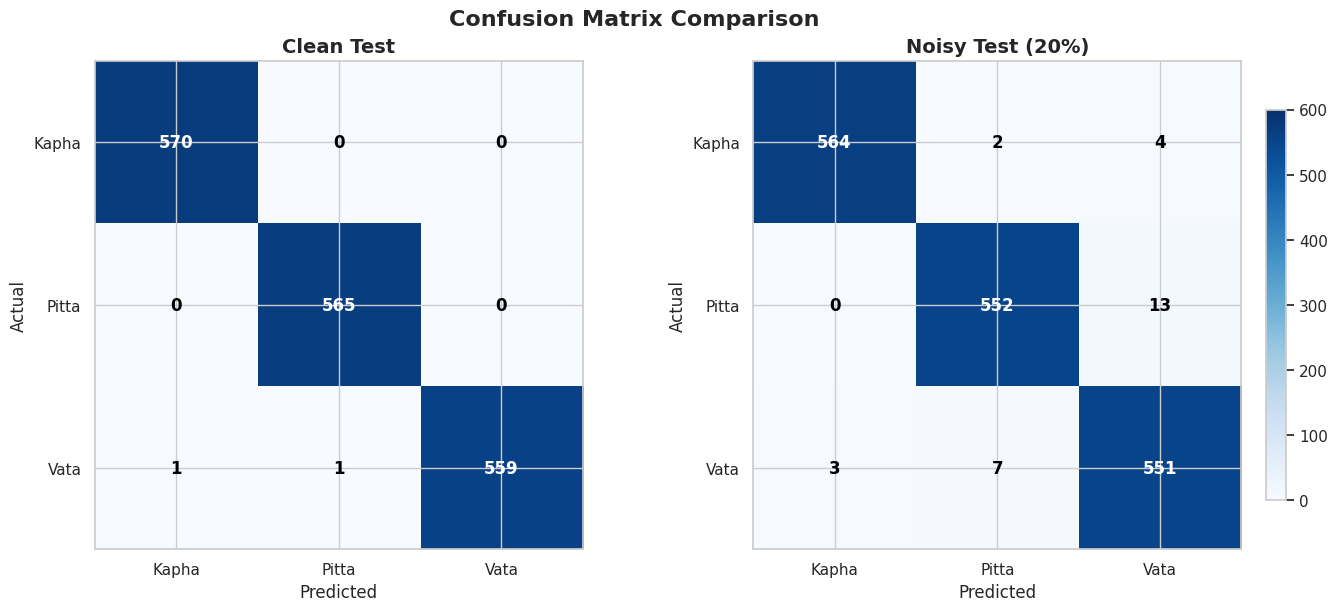

In [ ]:
labels = ['Kapha', 'Pitta', 'Vata']
cm_clean = confusion_matrix(y_test, y_pred_clean)
cm_noisy = confusion_matrix(y_test, y_pred_noisy)

fig, axs = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)  # Clean layout

for ax, cm, title in zip(axs, [cm_clean, cm_noisy], ['Clean Test', 'Noisy Test (20%)']):
    im = ax.imshow(cm, cmap='Blues', vmin=0, vmax=600)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Predicted', fontsize=12)
    ax.set_ylabel('Actual', fontsize=12)
    ax.set_xticks(range(3))
    ax.set_yticks(range(3))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    # Add text annotations
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i, j], ha='center', va='center',
                    color='white' if cm[i, j] > 300 else 'black', fontsize=12, fontweight='bold')

# Single shared colorbar (neater)
fig.colorbar(im, ax=axs.ravel().tolist(), shrink=0.8, pad=0.02)

plt.suptitle("Confusion Matrix Comparison", fontsize=16, fontweight='bold')
plt.show()

In [ ]:
plt.savefig("confusion_matrix_comparison.png", dpi=300)


<Figure size 640x480 with 0 Axes>

In [ ]:
import joblib

# Save model and encoder
joblib.dump(rf_model, 'prakriti_model.pkl')
joblib.dump(encoder, 'prakriti_encoder.pkl')


['prakriti_encoder.pkl']

In [ ]:
joblib.dump(encoder, 'prakriti_encoder.pkl')
print("✅ Encoder saved as prakriti_encoder.pkl")

✅ Encoder saved as prakriti_encoder.pkl


In [ ]:
import joblib

with open('prakriti_model.pkl', 'rb') as f:
    obj = joblib.load(f)

print(type(obj))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [ ]:
import pickle
import joblib

# Use the column names generated by the encoder
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out())

# ✅ Save as CSV
X_encoded_df.to_csv('stage1_input_features.csv', index=False)

# ✅ (Optional) Save as Pickle
with open('stage1_input_features.pkl', 'wb') as f:
    pickle.dump(X_encoded_df, f)

print("✅ Encoded input features saved for Stage 2 🎯")

✅ Encoded input features saved for Stage 2 🎯
